# Exam project: 4chan 

## 1) Data collection - 4plebs API

In [81]:
# data collection
import requests 
import json
import pandas as pd
import numpy as np
import gzip

# time formats etc.
import time
import pyprind
from datetime import datetime

# For the log file
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1.1) Comments data

### 1.1.1) Collect comments 

In [82]:
# # Load logfile
# import scraping_class
# logfile = 'log_4plebs_comments.csv'
# connector = scraping_class.Connector(logfile, overwrite_log=True)

In [ ]:
# data_list = []

# # Defines the page intervals and the bar lenth
# end = 630000  
# skip = 200             
# n = end/skip          

# # To keep track of time
# bar = pyprind.ProgBar(n, track_time=True, title='Progress') 

# # Collect data from 4 plebs
# for i in range(200000,end,skip):
    
#     # Try to collect the all comments
#     try:              
#         url = f"http://archive.4plebs.org/_/api/chan/index/?board=pol&page={i}&order=by_post" 
#         response,call_id = connector.get(url,'comments_final') 
#         _4pleb = response.json()
#         df_4pleb = pd.DataFrame(_4pleb).transpose()
#         df_4pleb = df_4pleb[df_4pleb['posts'].notna()].reset_index()

#         # We want all the comments from to one post 
#         for i in range (1,len(df_4pleb)):
#             df_4pleb_1 = pd.DataFrame(df_4pleb.loc[df_4pleb.index[i], 'posts'])[['comment', 'poster_country', 'timestamp', 'troll_country_name']]
#             data_list.append(df_4pleb_1)
            
#     # If the code written above reports back errors then pass onto next page        
#     except Exception:  
#             pass 
        
#     # Update the timer    
#     bar.update()
    
# # Concatenate the data
# df_com = pd.concat(data_list, axis = 0).reset_index().drop(columns =['index'])

# print(bar)

# # Save the raw data in a CSV-file
# df_com.to_csv('df_comments_raw_new.csv', index=False)

### 1.1.2) Plot of the log 

True     3150
False      50
Name: success, dtype: int64

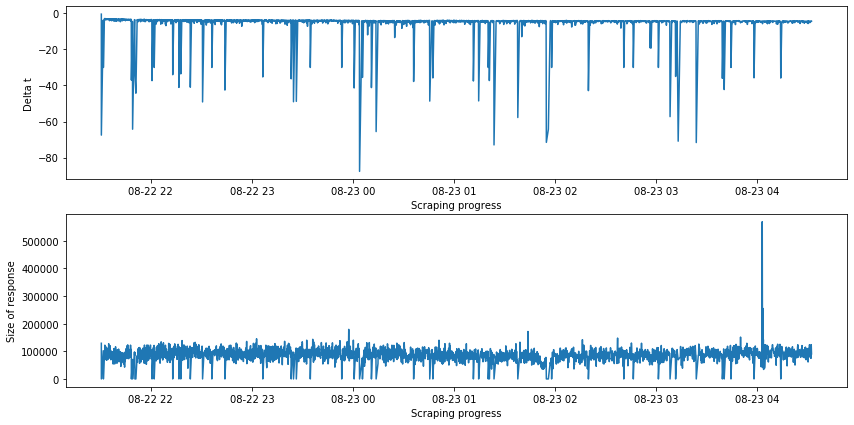

In [2]:
# Log for scraping
log_df = pd.read_csv('log_4plebs_comments.csv',sep=",") # load the ;-separated log 
%matplotlib inline

# Convert the time column 't' to datetime 
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')
#dt = log_df.dt.values[0]

# Make a dobble plot
f,ax = plt.subplots(2,1, figsize=(14,7))

# Plot the time it took to make the call
ax[0].set_ylabel('Delta t')
ax[0].set_xlabel('Scraping progress')
ax[0].plot(log_df.dt,log_df.delta_t)

# Plot the response size over time.
ax[1].set_ylabel('Size of response')
ax[1].set_xlabel('Scraping progress')
ax[1].plot(log_df.dt,log_df.response_size)

# Save the plot
plt.savefig('comments_scraping.pdf')

# Plot the delta_t against the response_size. These two should correlate pretty well.
# plt.scatter(log_df.delta_t,log_df.response_size)

# Count errors
log_df.success.value_counts() 

### 1.1.3) Clean the dataset

In [ ]:
# # Read the raw data
# df_com = pd.read_csv("df_comments_raw_new.csv")

# # print initial length of data
# print('Initial length of data', len(df_com.comment))

# # Convert time to GMT (which is fourchan_time minus 4 hours)
# df_com['date']=df_com['timestamp'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
# # strftime('%Y-%m-%d %H:%M:%S'))

# # Make a year and month and year/month variable
# df_com['date'] = df_com['date'].astype("datetime64")
# df_com['year'] = df_com['date'].dt.year
# df_com['month'] = df_com['date'].dt.month
# df_com['y_m'] = df_com['date'].dt.strftime('%Y-%m')

# # Delete observations with missing comments
# df_com=df_com[df_com['comment'].notna()]

# # print length of data after dropping empty columns
# print('Length of data after dropping empty columns', len(df_com.comment))

# # save dataframes:
# df_com.to_csv("df_comments_clean.csv", index=False)

### 1.1.4) Plot the number of comments against the date

C:\Users\annem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


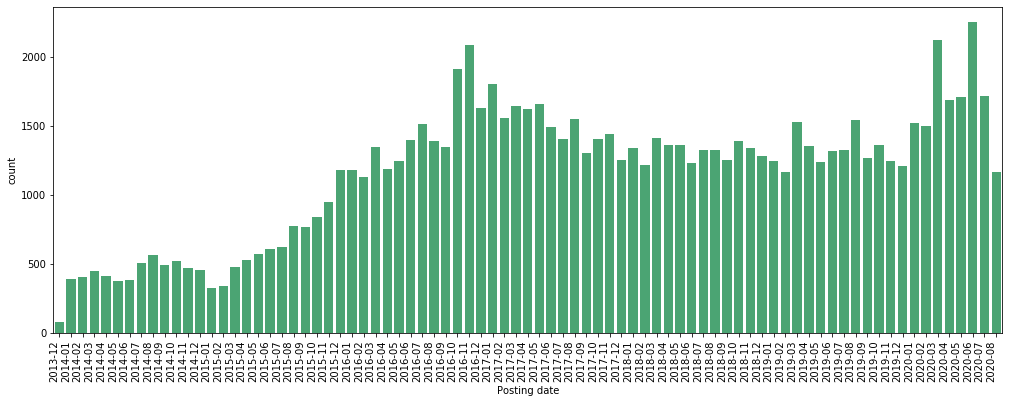

In [3]:
df_com = pd.read_csv("df_comments_clean.csv")
df_com['y_m']=df_com['m_y'] # Remmeber to delete!

# Ssort data
df_com = df_com.sort_values(by=['y_m'])

# Plotter antal comments pr måned,år.
fig, ax = plt.subplots(figsize = (17,6)) 
fig = sns.countplot(x='y_m', data=df_com, color='mediumseagreen') #powderblue
x_dates = df_com['y_m'].sort_values().unique()
ax = ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')
fig.set(xlabel='Posting date')

# Save the plot
plt.savefig('comments_timeline.pdf')

# HUSK til opgaven: undersmapling i 2016 november kan skyldes at alle trådene i virkeligheden er maksimal længde i de(n) dage(e)
# og vi fortsat kun samlper 5 kommentarer fra hver tråd.

## 1.2) Original Posts (OP) data

### 1.2.1) Collect OPs 

In [ ]:
# import scraping_class
# logfile = 'log_4plebs_OP.csv'## name your log file.
# connector = scraping_class.Connector(logfile, overwrite_log=True)

In [ ]:
# text_2=[]

# # Defines the page intervals and the bar lenth
# end =  630500
# skip = 500
# bar_n = end/skip

# # To keep track of time
# bar = pyprind.ProgBar(bar_n, track_time=True, title='Progress')

# # Collect data from 4 plebs
# for i in range(1,end,skip):
    
#     try:
    
#         url = f"http://archive.4plebs.org/_/api/chan/index/?board=pol&page={i}&order=by_post" 
#         response,call_id = connector.get(url,'4chan_data')
#         res = response.json() 
#         text = pd.DataFrame(res).transpose()
#         text_1 = pd.DataFrame(text['op'])
#         text_1 = text_1[text_1['op'].notna()]
    
#         for num in range(len(text_1)):
#             text_t =  pd.DataFrame(text_1['op'][num])[['title','comment','poster_country', 'troll_country_name','timestamp']].reset_index(drop=True).head(n=1)
#             text_2.append(text_t)
    
#     except Exception:
#         pass

#     # Update the timer 
#     bar.update()

# print(bar)

# # Concatenate the data
# df_op = pd.concat(text_2, ignore_index=True)

# # save dataframes, raw data:
# df_op.to_csv("df_op_raw.csv", index=False)

### 1.2.2) Plot of the log 

True     6300
False       1
Name: success, dtype: int64

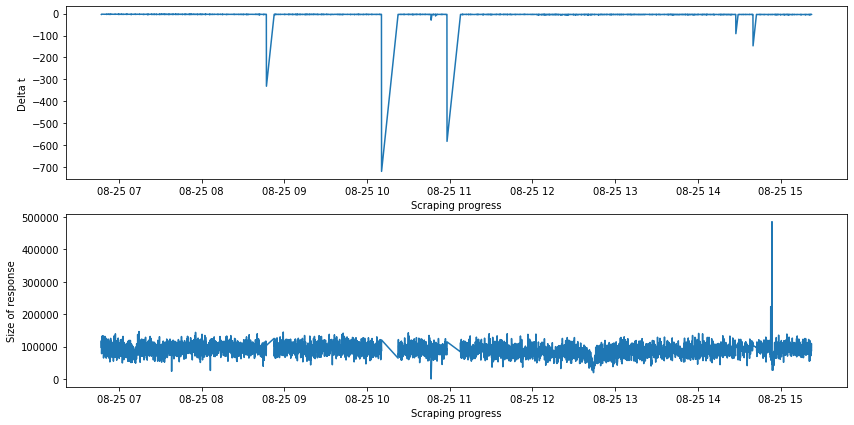

In [4]:
# Log for scraping
log_df = pd.read_csv('log_4plebs_OP.csv',sep=";") # load the ;-separated log 
%matplotlib inline

# Convert the time column 't' to datetime 
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')
#dt = log_df.dt.values[0]

# Make a dobble plot
f,ax = plt.subplots(2,1, figsize=(14,7))

# Plot the time it took to make the call
ax[0].set_ylabel('Delta t')
ax[0].set_xlabel('Scraping progress')
ax[0].plot(log_df.dt,log_df.delta_t)

# Plot the response size over time.
ax[1].set_ylabel('Size of response')
ax[1].set_xlabel('Scraping progress')
ax[1].plot(log_df.dt,log_df.response_size)

# Save the plot
plt.savefig('ops_scraper.pdf')

# Plot the delta_t against the response_size. These two should correlate pretty well.
# plt.scatter(log_df.delta_t,log_df.response_size)

# Count errors
log_df.success.value_counts() 

### 1.2.3) Clean the dataset

In [83]:
# # Read the raw data
# df_op = pd.read_csv("df_op_raw.csv")

# # print initial length of data
# print('Initial length of data', len(df_op.comment))

# # Convert time to GMT (which is fourchan_time minus 4 hours)
# df_op['date']=df_op['timestamp'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

# # Make a year and month and year/month variable
# df_op['date'] = df_op['date'].astype("datetime64")
# df_op['year'] = df_op['date'].dt.year
# df_op['month'] = df_op['date'].dt.month
# df_op['y_m'] = df_op['date'].dt.strftime('%Y-%m')

# # Delete observations with missing comments
# df_op=df_op[df_op['comment'].notna()]

# # print length of data after dropping empty columns
# print('length of data after dropping empty columns', len(df_op.comment))

# # save dataframes:
# df_op.to_csv("df_op_clean.csv", index=False)

Initial length of data 63000
length of data after dropping empty columns 60866


### 1.2.4) Plot the number of OPs against the date

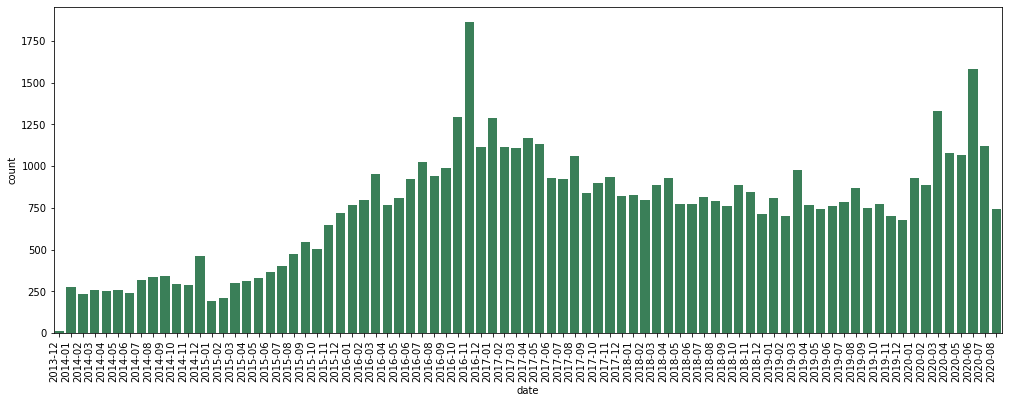

In [6]:
df_op = pd.read_csv("df_op_clean.csv")

# Sort data
df_op = df_op.sort_values(by=['y_m'])

# Plotter antal comments pr måned,år.
fig, ax = plt.subplots(figsize = (17,6)) 
fig = sns.countplot(x='y_m', data=df_op, color='seagreen') #powderblue
x_dates = df_op['y_m'].sort_values().unique()
ax = ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')
fig.set(xlabel='date')

# Save the plot
plt.savefig('ops_timeline.pdf')

## 1.3) Merge datasets

In [ ]:
# Read the comments data and generate a commment-id 
comments = pd.read_csv("df_comments_clean.csv")
comments['type'] = 'co'

# Read the op data and generate an op-id
ops = pd.read_csv("df_op_clean.csv")
ops['type'] = 'op'

# Concatenate the two datasets, sort for dates and reset the index
data = pd.concat([comments, ops], ignore_index=True)\
        .sort_values(by=['date'])\
        .reset_index(drop=True)

# Save the concatenated data as a CSV-file
data.to_csv("data_4pleps_all.csv.gz", index=False, compression="gzip")

In [86]:
#load data
with gzip.open('data_4pleps_all.csv.gz') as data_all:
df_all=pd.read_csv(data_all)

C:\Users\annem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,comment,poster_country,timestamp,troll_country_name,date,year,month,m_y,type,title,y_m
0,>>24759484\n\nbump,NaN,1388304139,NaN,2013-12-29 08:02:19,2013,12,2013-12,co,NaN,NaN
1,>>24755230\n>>24755219\n>>24754747\n>>24754741,NaN,1388306044,NaN,2013-12-29 08:34:04,2013,12,2013-12,co,NaN,NaN
2,Has anyone else read through the complete time...,NaN,1388306328,NaN,2013-12-29 08:38:48,2013,12,2013-12,co,NaN,NaN
3,>>24760884\n>They built this country\n\nthey b...,NaN,1388307555,NaN,2013-12-29 08:59:15,2013,12,2013-12,co,NaN,NaN
4,>>24761107\n\nCotton and Tobacco were this cou...,NaN,1388307910,NaN,2013-12-29 09:05:10,2013,12,2013-12,co,NaN,NaN


## 2) Preprocessing

In [87]:
import re
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [88]:
# Import own stopwords
def get_stopwords(file='stopwords_4chan.txt'):
    words = open(file,'r')
    stopwords = [word.strip() for word in words]
    return set(stopwords) 

stopwords_4chan = get_stopwords()

In [89]:
def preprocess(text):
    
    # 1) Remove links
    links = re.sub(r"http\S+", '', text)
    links_2 = re.sub(r"www\S+",'', links)
    # 2) Remove punktuation
    punct = re.sub(r'[^\w\s]','',links_2)
    # 3) Remove digits
    nodig = re.sub(r'\b\d+\b', '', punct)
    # 4) Lowercase the words
    lower = nodig.lower()
    # 5) Tokenize and remove stopwords and split the text into words 
    stop = [i for i in nltk.word_tokenize(lower) if i not in stopwords_4chan]
    # 6) Lemmatize words
    lemmas = [nltk.WordNetLemmatizer().lemmatize(t) for t in stop]
    # 7) Detokenize into posts again
    detoken = TreebankWordDetokenizer().detokenize(lemmas)
    
    return detoken # return a list of posts

In [90]:
start = time.time()

# Preprocess the data  
comments_preproc=[preprocess(text) for text in df_all.comment]

# Add to dataframe
df_all['preprocessed'] = comments_preproc

end = time.time()
print((end-start)/60, 'min')

1.3445841113726298 min


## 3) Descriptive analysis

In [14]:
from collections import Counter

### 3.1) most freequent words

In [15]:
count=Counter(" ".join(df_all['preprocessed']).split()).most_common(20)
df_count = pd.DataFrame(count)
print(df_count.to_latex(index=False))

\begin{tabular}{lr}
\toprule
       0 &      1 \\
\midrule
  people &  17934 \\
   trump &  14065 \\
   white &  13855 \\
    fuck &   8942 \\
    shit &   8352 \\
    time &   8279 \\
 fucking &   8249 \\
     jew &   7793 \\
   right &   7472 \\
   woman &   7394 \\
    year &   6934 \\
 country &   6802 \\
    good &   6636 \\
  nigger &   6549 \\
   black &   6299 \\
   world &   6033 \\
     guy &   5685 \\
  really &   4983 \\
   never &   4970 \\
     new &   4890 \\
\bottomrule
\end{tabular}



### 3.2) count word pr. year

In [16]:
# Divide dataset by year - we need to make a year variable
data_2013 = df_all.query('year == 2013')
data_2014 = df_all.query('year == 2014')
data_2015 = df_all.query('year == 2015')
data_2016 = df_all.query('year == 2016')
data_2017 = df_all.query('year == 2017')
data_2018 = df_all.query('year == 2018')
data_2019 = df_all.query('year == 2019')
data_2020 = df_all.query('year == 2020')

In [17]:
# create new dataframe which counts the words each year
countyear=[]

for year in range(2013,2021):
    df_all.query('year == year')
    count=Counter(" ".join(df_all.query(f'year == {year}')['preprocessed']).split()).most_common(500)
    df_year = pd.DataFrame(count)
    df_year['y']=year
    countyear.append(df_year)

datayear= pd.concat(countyear, ignore_index=True)   

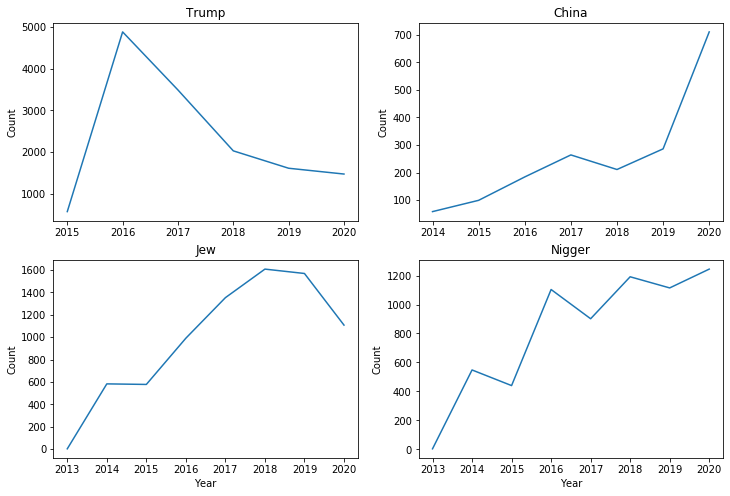

In [18]:
trump= datayear.loc[datayear[0]=='trump'].sort_values([0, 'y'], ascending=[True,True]).rename(columns={0: 'word', 1: 'Count', 'y': ' '})
china= datayear.loc[datayear[0]=='china'].sort_values([0, 'y'], ascending=[True,True]).rename(columns={0: 'word', 1: 'Count', 'y': ' '})
jew= datayear.loc[datayear[0]=='jew'].sort_values([0, 'y'], ascending=[True,True]).rename(columns={0: 'word', 1: 'Count', 'y': 'Year'})
nigger= datayear.loc[datayear[0]=='nigger'].sort_values([0, 'y'], ascending=[True,True]).rename(columns={0: 'word', 1: 'Count', 'y': 'Year'})

f,ax = plt.subplots(2,2, figsize=(12,8))
sns.lineplot(x=trump[' '], y=trump['Count'], ax=ax[0,0]).set_title('Trump')
sns.lineplot(x=china[' '], y=china['Count'], ax=ax[0,1]).set_title('China')
sns.lineplot(x=jew['Year'], y=jew['Count'], ax=ax[1,0]).set_title('Jew')
sns.lineplot(x=nigger['Year'], y=nigger['Count'], ax=ax[1,1]).set_title('Nigger')
plt.savefig('wordcount_new.pdf')

## 4) K-means clustering with tf-idf vectorizer

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

### 4.1) TF-IDF with n-grams. Using unigrams and bigrams hence possibly getting eg. red pill if they appear enough in context.

In [21]:
start = time.time()

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=.8, min_df=.001, max_features=3000, stop_words=stopwords_4chan)   
X = vectorizer.fit_transform(df_all['preprocessed'])

end = time.time()
print((end-start)/60, 'min')

0.3602953592936198 min


### 4.2) Implementation of our k-means clustering algorithm 


In [22]:
start = time.time()

# implementation of our k-means clustering algorithm 
true_k = 18
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=25, random_state=0).fit(X)
labels = model.labels_

# get the centroids and features
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

end = time.time()
print((end-start)/60, 'min')

30.70242235660553 min


In [24]:
print('Distortion: %.2f' % model.inertia_)

Distortion: 132844.36


In [25]:
#Print clusters
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :7]: #number of shown words from each cluster. 
        print(" %s" % terms[ind])

Cluster 0:
 world
 country
 war
 people
 world war
 america
 rest
Cluster 1:
 nigger
 fuck
 white
 fucking
 hate
 kill
 black
Cluster 2:
 actually
 feel
 people
 believe
 guy
 right
 bad
Cluster 3:
 jew
 jewish
 white
 israel
 hate
 people
 muslim
Cluster 4:
 trump
 donald
 donald trump
 pres
 president
 pres trump
 vote
Cluster 5:
 right
 guy
 mean
 really
 year
 country
 kek
Cluster 6:
 fucking
 fuck
 shit
 stupid
 retard
 hate
 kek
Cluster 7:
 fuck
 kike
 guy
 wrong
 holy
 shut
 shit
Cluster 8:
 shit
 holy shit
 holy
 fuck
 fucking
 piece shit
 people
Cluster 9:
 white
 white people
 people
 black
 race
 white man
 man
Cluster 10:
 good
 pretty good
 good luck
 luck
 goy
 feel
 bad
Cluster 11:
 time
 every
 every time
 year
 people
 last
 back
Cluster 12:
 love
 wtf
 much
 hate
 guy
 people
 fucking
Cluster 13:
 state
 united
 united state
 america
 absolute
 country
 trump
Cluster 14:
 woman
 men
 white woman
 white
 black
 man
 black woman
Cluster 15:
 people
 black
 black people


In [26]:
# Print the size of each clusters
print(Counter(labels))  

Counter({5: 102939, 15: 7042, 9: 4856, 4: 4544, 11: 3736, 8: 3602, 14: 3114, 3: 3047, 0: 3041, 6: 3022, 10: 2656, 7: 2643, 2: 2615, 1: 2302, 13: 2030, 16: 1815, 12: 1131, 17: 1066})


### 4.3) Grouping clusters into fewer units and plotting them over time

In [28]:
# Add a column with the predicted cluster
df_all['clusters'] = model.predict(X)

In [69]:
Groups = pd.Series([]) 

# loop: grouping clusters into fewer units 
for i in range(len(df_all)): 

    if df_all["clusters"][i] == 0: # Politics and war
        Groups[i] = "Politics and war"
  
    elif df_all["clusters"][i] == 11: 
        Groups[i]= 'Politics and war'
  
    elif df_all["clusters"][i] == 1:  # Racism
        Groups[i]= 'Racism'
        
    elif df_all["clusters"][i] == 9: 
        Groups[i]= 'Racism'
        
    elif df_all["clusters"][i] == 6: # Hate
        Groups[i]= 'Hate'
        
    elif df_all["clusters"][i] == 7: 
        Groups[i]= 'Hate'
    
    elif df_all["clusters"][i] == 8: 
        Groups[i]= 'Hate'
        
    elif df_all["clusters"][i] == 16: 
        Groups[i]= 'Hate'
        
    elif df_all["clusters"][i] == 2: # Youtube and gaming
        Groups[i]= 'Youtube and gaming'
    
    elif df_all["clusters"][i] == 10: 
        Groups[i]= 'Youtube and gaming'
        
    elif df_all["clusters"][i] == 17: 
        Groups[i]= 'Youtube and gaming'
        
    elif df_all["clusters"][i] == 5: # other 
        Groups[i]= 'Other'
    
    elif df_all["clusters"][i] == 12: 
        Groups[i]= 'Other'
        
    elif df_all["clusters"][i] == 3: # Anti-Semitism
        Groups[i]= 'Anti-Semitism'
        
    elif df_all["clusters"][i] == 4: # USA
        Groups[i]= 'USA'
        
    elif df_all["clusters"][i] == 13: 
        Groups[i]= 'USA'
        
    elif df_all["clusters"][i] == 15: # Race
        Groups[i]= 'Race'
        
    elif df_all["clusters"][i] == 14: # Women hate/objectification
        Groups[i]= 'Women hate/objectification'
          
# inserting new column with values of list made above         
df_all.insert(2, "Groups", Groups) 

C:\Users\annem\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [70]:
# Counting the yearly size of each cluster and transponing the dataset 
df_plot = df_all.groupby(['Groups', 'year']).size().reset_index().pivot(columns='Groups', index='year', values=0).fillna(0)

# Convert into a yearly shares in pct.
data_perc = df_plot.divide(df_plot.sum(axis=1), axis=0)*100

# df_plot.plot(kind='bar', stacked=True)

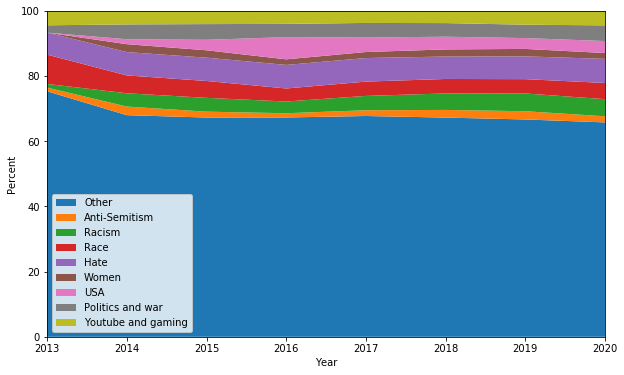

In [71]:
# Plot the development of the groups
plt.rcParams["figure.figsize"] = 10,6

labels = ["Other", "Anti-Semitism", "Racism", "Race",  "Hate", "Women", "USA", "Politics and war", "Youtube and gaming"]
plt.stackplot(data_perc.index, data_perc["Other"], data_perc["Anti-Semitism"],  data_perc["Racism"],
              data_perc["Race"], data_perc["Hate"], data_perc["Women hate/objectification"],
               data_perc["USA"], data_perc["Politics and war"] , data_perc["Youtube and gaming"], labels=labels)
plt.legend(loc='lower left')
plt.margins(0,0)
plt.xlabel('Year')
plt.ylabel('Percent')

plt.savefig('Clusters_graph.pdf', bbox_inches='tight', dip=200)
plt.show()

In [73]:
# Print quotes from other category
test = df_all.query('Groups == "Other"').reset_index(drop=True)
test.comment[10]
# 2700
# 3800
# 5
# 100

'Abolish all religion in govt. Implement production of sustained, beneficial technology. Divide planet into three sects, rule planet with a logical, balanced, and dynamic oligarchy... and reduce planet by 2/3rds.'

### 4.4) The Elbow method

In [186]:
start = time.time()

distortions = []

# K-means clustering for the range of 0-19 clusters
for i in range(1, 20):
    elbow = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=0)
    elbow.fit(X)
    distortions.append(elbow.inertia_)
    
end = time.time()
print((end-start)/60, 'min')

430.28198178211846 min


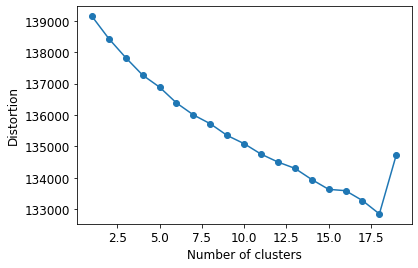

In [188]:
# Plot the Elbow method
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.savefig('Elbow.pdf', bbox_inches='tight')
plt.show()

## 5) Word2Vec and embettings

In [91]:
from gensim.models import Word2Vec

### 5.1) Tokenizer vores rensede data inden embedding.

In [92]:
df_all['embedding'] = df_all.apply(lambda row: nltk.word_tokenize(row['preprocessed']), axis=1)

### 5.2) Model training
Using 30 'weights'. min_count = min total frequency. window examines words 5 euqals 2 on either side.
sg can be specified if we wish t use skip-gram or continuous bag of words(CBOW), CBOW is default. 

In [93]:
sentences = df_all['embedding']

# train model
model = Word2Vec(sentences, size=50, min_count=10, window=5, negative=3, iter=100) # min freq words, window 2 words before and after. Negative sets down computing speed.

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.vocab)
#print(words)

Word2Vec(vocab=15300, size=50, alpha=0.025)


In [94]:
# save model
model.wv.save_word2vec_format('model.txt', binary=False)

### 5.3) Print most similar (testing model) 

In [190]:
model.most_similar('muslim')

C:\Users\annem\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.7563483715057373),
 ('arab', 0.7504554986953735),
 ('sunni', 0.7078418731689453),
 ('islamic', 0.6817183494567871),
 ('invader', 0.6471699476242065),
 ('terrorist', 0.6455820202827454),
 ('pakistani', 0.6411546468734741),
 ('shariah', 0.6253423094749451),
 ('refugee', 0.6244929432868958),
 ('infidel', 0.612149178981781)]

In [160]:
model.most_similar(positive=['nigger','jew'], negative=['black'])

C:\Users\annem\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('kike', 0.8497143983840942),
 ('christcucks', 0.6405354738235474),
 ('zog', 0.6338761448860168),
 ('filthy', 0.5945688486099243),
 ('mudslimes', 0.5907697677612305),
 ('goy', 0.5902329683303833),
 ('shitskins', 0.5678730607032776),
 ('sandniggers', 0.5674103498458862),
 ('golem', 0.5531189441680908),
 ('anglos', 0.5497149229049683)]

In [164]:
model.most_similar(positive=['trump','russia'], negative=['america'])

C:\Users\annem\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('putin', 0.7833645939826965),
 ('kremlin', 0.7122398018836975),
 ('bibi', 0.6562818288803101),
 ('tulsi', 0.6287297606468201),
 ('collusion', 0.6271053552627563),
 ('erdogan', 0.6225883960723877),
 ('dnc', 0.6031634211540222),
 ('flynn', 0.6002129912376404),
 ('russian', 0.5936729907989502),
 ('comey', 0.5852342844009399)]

In [187]:
model.most_similar(positive=['king','woman'], negative=['man'])

C:\Users\annem\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('exception', 0.5521645545959473),
 ('slave', 0.5162874460220337),
 ('prince', 0.5076345205307007),
 ('venetian', 0.495974600315094),
 ('egypt', 0.4943248927593231),
 ('descendent', 0.4915384352207184),
 ('indo', 0.48929038643836975),
 ('rome', 0.4779985845088959),
 ('ghana', 0.47213393449783325),
 ('warsaw', 0.4715201258659363)]

### 5.4) Plots
Documentation: https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

In [99]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [151]:
#setting words
keys = ['nigger', 'kike', 'mudslime', 'trump', 'qanon', 'altright', 'incel']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

C:\Users\annem\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
C:\Users\annem\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [152]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

#### 5.4.1 ) Plotting similar words

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

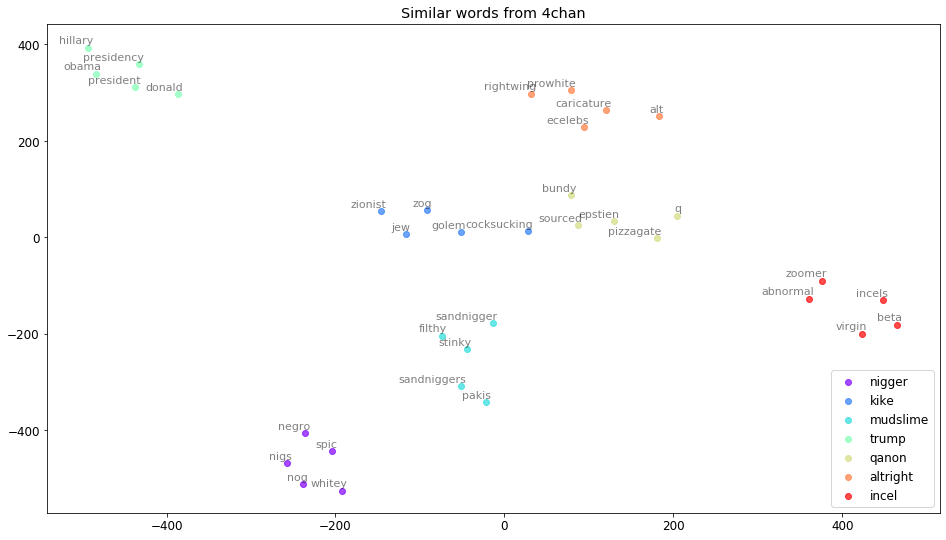

In [185]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=11 , color='black')
    
    plt.rcParams.update({'font.size': 12})
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(False)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')



tsne_plot_similar_words('Similar words from 4chan', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

plt.savefig('embetting2.pdf', bbox_inches='tight', dip=200)